In [1]:
import pandas as pd

In [2]:
mush = pd.read_csv('../data/mushrooms.csv')
mush.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
encodedmush = mush.apply(le.fit_transform)

In [4]:
encodedmush['class'] = pd.cut(encodedmush['class'], bins=2, labels=['edible','poison'])
encodedmush.head(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,poison,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,edible,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,edible,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,poison,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,edible,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


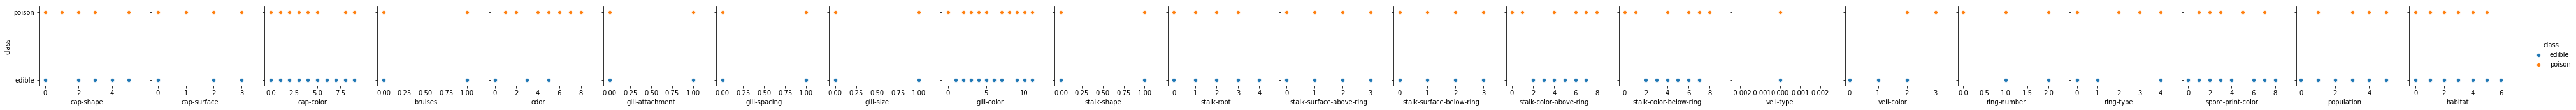

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

feats = [x for x in list(encodedmush) if x != 'class']
pp = sns.pairplot(data=encodedmush, 
                  x_vars = feats,
                  y_vars = 'class',
                  hue='class')
plt.show()

In [10]:
import importlib.util
spec = importlib.util.spec_from_file_location("GMM", "../code/GMM.py")
GMM = importlib.util.module_from_spec(spec)
spec.loader.exec_module(GMM)

In [13]:
test = encodedmush.head(500).drop('class', axis = 1)
mush_test = test[['odor', 'cap-color']].values

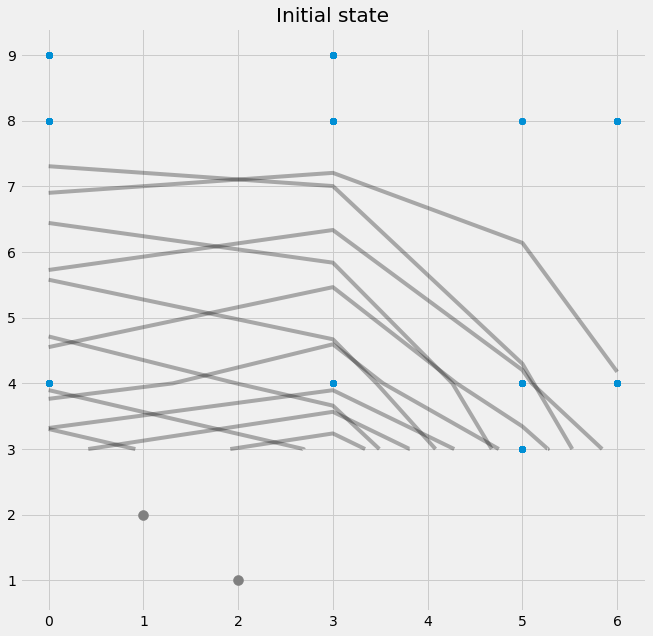

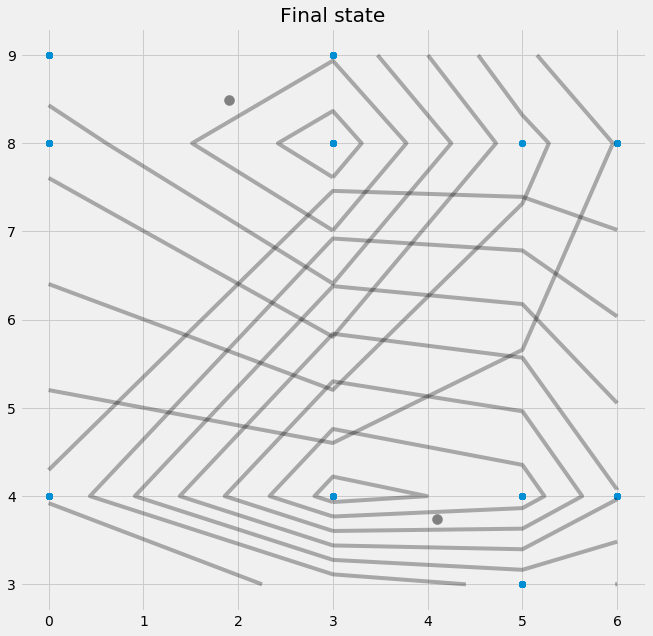

In [14]:
GMM_mod = GMM.GMM(mush_test, 2, 75)
GMM_mod.fit()